In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [157]:
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
matplotlib.rc('font', family=font_name)

# 이탈 기준 설정하기

## RFM
R: Recency 최근 주문일
F: Frequency 주문수
M: Monetary 총 구매 금액

In [158]:
model_df = pd.read_csv('df/model_df.csv')

(99441, 5) (99441, 8) (103886, 5)


In [159]:
model_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


### F_score

### R_score, M_score

## 배송 변수 병합 및 준비 (* 피처 생성)

#### 변수 병합

In [179]:
# cols_to_drop = ['delay_days', 'total_days', 'approval_days']
# rfm_df.drop(columns=cols_to_drop, inplace=True)
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91465 entries, 0 to 91464
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customer_unique_id  91465 non-null  object  
 1   Recency             91465 non-null  int64   
 2   Frequency           91465 non-null  int64   
 3   Monetary            91465 non-null  float64 
 4   Frequency_level     91465 non-null  category
 5   F_score             91465 non-null  int64   
 6   R_quantile          91465 non-null  int64   
 7   M_quantile          91465 non-null  int64   
 8   R_score             91465 non-null  int64   
 9   M_score             91465 non-null  int64   
 10  RFM_score           91465 non-null  object  
 11  churn               91465 non-null  int64   
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 7.8+ MB


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113193 entries, 0 to 113192
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       113193 non-null  object         
 1   customer_id                    113193 non-null  object         
 2   order_status                   113193 non-null  object         
 3   order_purchase_timestamp       113193 non-null  datetime64[ns] 
 4   order_approved_at              113193 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   113193 non-null  object         
 6   order_delivered_customer_date  113193 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  113193 non-null  datetime64[ns] 
 8   customer_unique_id             113193 non-null  object         
 9   payment_sequential             113193 non-null  float64        
 10  payment_type                   113193 non-null  object  

In [181]:
# unique_id 에 맞춰 평균으로 처리
for_model_df = df.groupby('customer_unique_id').agg({
    'delay_days': 'mean',
    'total_days': 'mean',
    'approval_days': 'mean',
    'review_flag': 'sum',
    'review_length': 'mean',
    'order_status_binary':'sum',
    'category_num':'sum'



}).reset_index()
for_model_df.head()
print(f'deliver_df 평균처리 후 개수: {len(for_model_df)}')

# rfm 테이블 병합
# 배송정보 있는 고객만 체크
rfm_df = rfm_df.merge(
    for_model_df,
    on='customer_unique_id',
    how='inner'
)
rfm_df.head()
print(f'model_df 병합 후 개수: {len(rfm_df)}')

deliver_df 평균처리 후 개수: 91465
model_df 병합 후 개수: 91465


In [182]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91465 entries, 0 to 91464
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customer_unique_id   91465 non-null  object  
 1   Recency              91465 non-null  int64   
 2   Frequency            91465 non-null  int64   
 3   Monetary             91465 non-null  float64 
 4   Frequency_level      91465 non-null  category
 5   F_score              91465 non-null  int64   
 6   R_quantile           91465 non-null  int64   
 7   M_quantile           91465 non-null  int64   
 8   R_score              91465 non-null  int64   
 9   M_score              91465 non-null  int64   
 10  RFM_score            91465 non-null  object  
 11  churn                91465 non-null  int64   
 12  delay_days           91465 non-null  float64 
 13  total_days           91465 non-null  float64 
 14  approval_days        91465 non-null  float64 
 15  review_flag        

## 모델링

### 데이터 준비

In [214]:
model_df.to_csv('model_df.csv', index=False)

In [215]:
df.to_csv('df.csv', index=False)

In [183]:
model_df = rfm_df

In [184]:
model_df.head()
# model_df.describe()

,customer_unique_id,Recency,Frequency,Monetary,Frequency_level,F_score,R_quantile,M_quantile,R_score,M_score,RFM_score,churn,delay_days,total_days,approval_days,review_flag,review_length,order_status_binary,category_num
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,low,1,1,3,4,4,414,0,4.0,7.0,1.0,1,111.0,0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,low,1,1,0,4,1,411,0,4.0,4.0,1.0,0,0.0,0,0.0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,low,1,4,1,1,2,112,1,1.0,26.0,1.0,0,0.0,0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,low,1,3,0,2,1,211,1,11.0,21.0,1.0,1,12.0,0,0.0
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,low,1,3,3,2,4,214,1,7.0,14.0,1.0,0,0.0,0,0.0


In [187]:
# 사용 변수 (RFM + 배송관련 변수)
features = ['Frequency', 'Monetary',
            'delay_days', 'total_days', 'approval_days','review_flag','review_length', 'order_status_binary', 'category_num']

# 타겟 변수
target = 'churn'

X = model_df[features]
y = model_df[target]

# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train_scaled, columns=features).head()
# pd.DataFrame(X_train, columns=features).head()

(73172, 9) (73172,)
(18293, 9) (18293,)


,Frequency,Monetary,delay_days,total_days,approval_days,review_flag,review_length,order_status_binary,category_num
0,-0.162044,-0.081249,-0.388866,-0.535925,1.032488,0.567302,1.605398,-0.006986,-0.147572
1,-0.162044,-0.036076,-0.488575,-0.747959,-0.368360,-0.666408,-0.579940,-0.006986,-0.147572
2,-0.162044,-0.215422,0.309097,-0.535925,-0.368360,-0.666408,-0.579940,-0.006986,-0.147572
3,-0.162044,-0.062424,-0.588284,-0.005840,1.032488,-0.666408,-0.579940,-0.006986,-0.147572
4,-0.162044,-0.068037,-1.984209,2.114501,-0.368360,-0.666408,-0.579940,-0.006986,-0.147572


### 모델 학습 및 예측

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'class_weight':['balanced', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}
grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid=param_grid, cv=5, scoring='accuracy' )
grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_
print('Best params:', grid.best_params_)
print('Best accuracy:', grid.best_score_)
print('Best model:', grid.best_estimator_)

Best params: {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.6036051971953498
Best model: LogisticRegression(C=0.01, max_iter=500, penalty='l1', solver='liblinear')


In [189]:
# 모델 학습
model = LogisticRegression(
    max_iter=500,
    class_weight='balanced',
    C= 10,
    penalty='l1',
    solver='liblinear'
)
model.fit(X_train_scaled, y_train)

# 모델 예측
y_pred = model.predict(X_test_scaled)
y_pred_best = best_model.predict(X_test_scaled)

### 모델 평가

In [190]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.5241895807139343
Confusion Matrix: 
 [[5839 5195]
 [3509 3750]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.53      0.57     11034
           1       0.42      0.52      0.46      7259

    accuracy                           0.52     18293
   macro avg       0.52      0.52      0.52     18293
weighted avg       0.54      0.52      0.53     18293



In [191]:
# coef_
model.coef_.shape # (1, 1, 6)
print(model.coef_)

[[-0.08024251  0.00636174  0.16717393  0.14616727  0.01660748 -0.02515919
   0.00675321  0.01051885 -0.00851455]]


               feature  coefficient
2           delay_days     0.167174
3           total_days     0.146167
0            Frequency    -0.080243
5          review_flag    -0.025159
4        approval_days     0.016607
7  order_status_binary     0.010519
8         category_num    -0.008515
6        review_length     0.006753
1             Monetary     0.006362


C:\Users\playdata\AppData\Local\Temp\ipykernel_9084\604632286.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='coefficient', y='feature', palette='coolwarm')


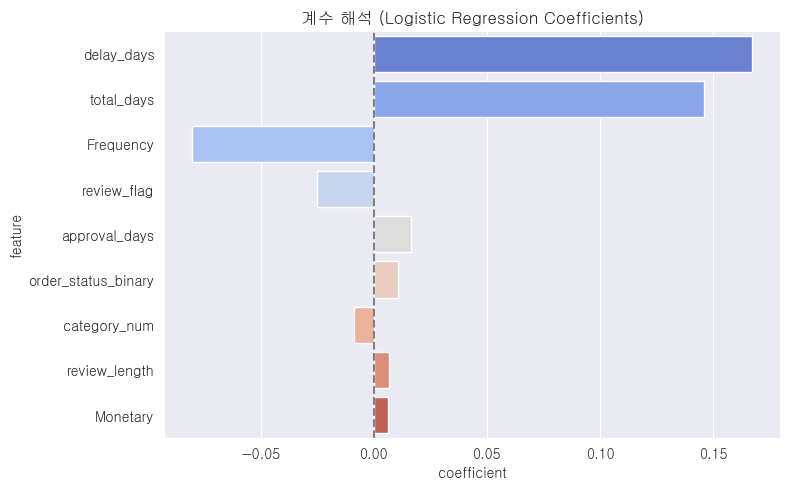

In [192]:
# 계수 해석 (feature 영향)
importance_df = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

print(importance_df)

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='coefficient', y='feature', palette='coolwarm')

plt.title('계수 해석 (Logistic Regression Coefficients)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [193]:
!pip install xgboost

In [200]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 1. 파이프라인 정의
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# 2. GridSearchCV 파라미터 정의 (★ xgb__prefix 필수!)
param_grid = {
    'xgb__n_estimators': [100, 300],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'xgb__subsample': [0.8, 1.0],
    'xgb__colsample_bytree': [0.8, 1.0]
}

# 3. GridSearchCV 적용
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',  # 회귀면 'neg_mean_squared_error'
    cv=3,
    n_jobs=-1,
    verbose=1
)

# 4. 학습
grid_search.fit(X_train, y_train)

# 5. 결과 확인
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)




Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\playdata\miniconda3\envs\ai_basic_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:21:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 300, 'xgb__subsample': 1.0}
Best Score: 0.6266741490888048


In [209]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# 예측값
y_pred = grid_search.predict(X_test)

# 정확도
print("Accuracy:", accuracy_score(y_test, y_pred))

# 정밀도
print("Precision:", precision_score(y_test, y_pred))

# 재현율
print("Recall:", recall_score(y_test, y_pred))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# ROC AUC (이진 분류만)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

# 분류 리포트 및 혼동행렬
print("\n[Classification Report]")
print(classification_report(y_test, y_pred))

print("\n[Confusion Matrix]")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6260864811676597
Precision: 0.5581459894532335
Recall: 0.2770354043256647
F1 Score: 0.37028171607438776
ROC AUC: 0.6522770368276212

[Classification Report]
              precision    recall  f1-score   support

           0       0.64      0.86      0.73     11034
           1       0.56      0.28      0.37      7259

    accuracy                           0.63     18293
   macro avg       0.60      0.57      0.55     18293
weighted avg       0.61      0.63      0.59     18293


[Confusion Matrix]
[[9442 1592]
 [5248 2011]]


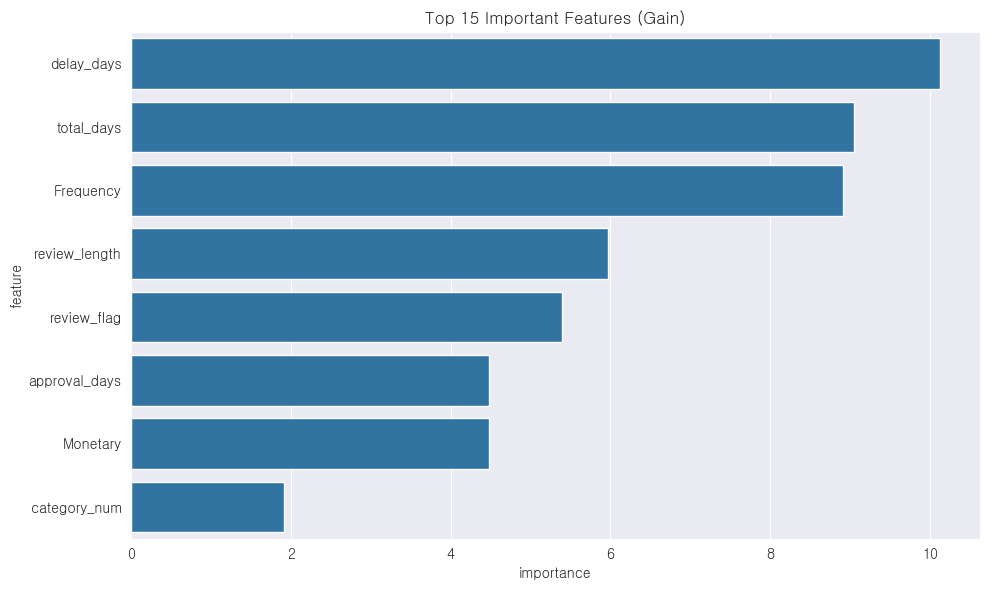

In [210]:
# 3. Feature Importance 추출 및 시각화
# 최적 모델 추출
best_model = grid_search.best_estimator_
xgb_model = best_model.named_steps['xgb']
importances = xgb_model.get_booster().get_score(importance_type='gain')

# f0, f1 등을 실제 변수명으로 매핑
feature_names = X_train.columns  # 또는 X_test.columns, 동일한 열이라면
importances_named = {
    feature_names[int(k[1:])]: v for k, v in importances.items()
}

importance_df = pd.DataFrame({
    'feature': list(importances_named.keys()),
    'importance': list(importances_named.values())
}).sort_values(by='importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df.head(15))
plt.title('Top 15 Important Features (Gain)')
plt.tight_layout()
plt.show()


In [212]:
import pickle

# 최적 모델 저장
with open('best_model.pkl', 'wb') as f:
    pickle.dump((xgb_model, X_train.columns.tolist()), f)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import pickle

# 모델 및 파라미터 정의 (확장 버전)
models_and_params = {
    'XGBoost': {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [3, 5, 7],
            'model__learning_rate': [0.01, 0.05, 0.1],
            'model__subsample': [0.6, 0.8, 1.0],
            'model__colsample_bytree': [0.6, 0.8, 1.0],
            'model__gamma': [0, 1, 5],
            'model__reg_alpha': [0, 0.1, 1],
            'model__reg_lambda': [1, 5, 10]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [-1, 5, 10],
            'model__learning_rate': [0.01, 0.05, 0.1],
            'model__subsample': [0.6, 0.8, 1.0],
            'model__colsample_bytree': [0.6, 0.8, 1.0],
            'model__num_leaves': [31, 50, 100],
            'model__reg_alpha': [0, 0.1, 1],
            'model__reg_lambda': [0, 1, 5]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'model__n_estimators': [100, 200, 300],
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4],
            'model__max_features': ['sqrt', 'log2', None],
            'model__bootstrap': [True, False]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {
            'model__C': [0.01, 0.1, 1.0, 10],
            'model__penalty': ['l1', 'l2', 'elasticnet'],
            'model__solver': ['saga'],
            'model__l1_ratio': [None, 0.5, 1.0]  # Only used if penalty='elasticnet'
        }
    }
}

# 학습 및 저장
for name, config in models_and_params.items():
    print(f"Training {name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        scoring='accuracy',
        cv=3,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)

    print(f"[{name}] Best Params:", grid.best_params_)
    print(f"[{name}] Best Score: {grid.best_score_:.4f}")

    # 모델 저장
    with open(f'{name}_final.pkl', 'wb') as f:
        pickle.dump((grid, X_train.columns.tolist()), f)


Training XGBoost...
Fitting 3 folds for each of 6561 candidates, totalling 19683 fits
